# Exam 4th of January 2024, 8.00-13.00 for the course 1MS041 (Introduction to Data Science / Introduktion till dataanalys)

## Instructions:
1. Complete the problems by following instructions.
2. When done, submit this file with your solutions saved, following the instruction sheet.

This exam has 3 problems for a total of 40 points, to pass you need
20 points. The bonus will be added to the score of the exam and rounded afterwards.

## Some general hints and information:
* Try to answer all questions even if you are uncertain.
* Comment your code, so that if you get the wrong answer I can understand how you thought
this can give you some points even though the code does not run.
* Follow the instruction sheet rigorously.
* This exam is partially autograded, but your code and your free text answers are manually graded anonymously.
* If there are any questions, please ask the exam guards, they will escalate it to me if necessary.

## Tips for free text answers
* Be VERY clear with your reasoning, there should be zero ambiguity in what you are referring to.
* If you want to include math, you can write LaTeX in the Markdown cells, for instance `$f(x)=x^2$` will be rendered as $f(x)=x^2$ and `$$f(x) = x^2$$` will become an equation line, as follows
$$f(x) = x^2$$
Another example is `$$f_{Y \mid X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha \cdot x + \beta)$$` which renders as
$$f_{Y \mid X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha \cdot x + \beta)$$

## Finally some rules:
* You may not communicate with others during the exam, for example:
    * You cannot ask for help in Stack-Overflow or other such help forums during the Exam.
    * You may not communicate with AI's, for instance ChatGPT.
    * Your on-line and off-line activity is being monitored according to the examination rules.

## Good luck!

In [1]:
# Insert your anonymous exam ID as a string in the variable below
examID="0004-KEZ"


---
## Exam vB, PROBLEM 1
Maximum Points = 14


In this problem you will do rejection sampling from complicated distributions, you will also be using your samples to compute certain integrals, a method known as Monte Carlo integration: (Keep in mind that choosing a good sampling distribution is often key to avoid too much rejection)

1. [4p] Fill in the remaining part of the function `problem1_inversion` in order to produce samples from the below distribution using rejection sampling:

$$
    F[x] = 
    \begin{cases}
        0, & x \leq 0 \\
        \frac{e^{x^2}-1}{e-1}, & 0 < x < 1 \\
        1, & x \geq 1
    \end{cases}
$$

2. [2p] Produce 100000 samples (**use fewer if it times-out and you cannot find a solution**) and put the answer in `problem1_samples` from the above distribution and plot the histogram together with the true density. *(There is a timeout decorator on this function and if it takes more than 10 seconds to generate 100000 samples it will timeout and it will count as if you failed to generate.)*
3. [2p] Use the above 100000 samples (`problem1_samples`) to approximately compute the integral

$$
    \int_0^{1} \sin(x) \frac{2e^{x^2} x}{e-1} dx
$$
and store the result in `problem1_integral`.

4. [2p] Use Hoeffdings inequality to produce a 95\% confidence interval of the integral above and store the result as a tuple in the variable `problem1_interval`

5. [4p] Fill in the remaining part of the function `problem1_inversion_2` in order to produce samples from the below distribution using rejection sampling:
$$
    F[x] = 
    \begin{cases}
        0, & x \leq 0 \\
        20xe^{20-1/x}, & 0 < x < \frac{1}{20} \\
        1, & x \geq \frac{1}{20}
    \end{cases}
$$
Hint: this is tricky because if you choose the wrong sampling distribution you reject at least 9 times out of 10. You will get points based on how long your code takes to create a certain number of samples, if you choose the correct sampling distribution you can easily create 100000 samples within 2 seconds.

In [ ]:
# Algorithm 1 Accept-Reject Sampler
# 1: input:
# (1) a target density f (x),
# (2) a sampling density g(x) that satisfies f (x) ≤ M g(x).
# 2: output: a sequence of samples x0, . . . with distribution f
# 3: Sample initial state X(0) from g.
# 4: repeat
# 5: At iteration t,
# 6: Generate x from g and compute the ratio r(x) = f (x)/Mg(x)
# 7: Draw U ∼ Uniform([0, 1]) and set Xt+1 = x, if U ≤ r(x), otherwise goto 6
# 8: until desired number of samples are obtained.

In [85]:

# Part 1

from Utils import timeout
import random
import numpy as np

#@timeout
def problem1_inversion(n_samples=1):
    # Distribution from part 1
    # write the code in this function to produce samples from the distribution in the assignment
    # Make sure you choose a good sampling distribution to avoid unnecessary rejections
    
    #initiate output variable
    output = []
    
    #inverse(derivative) of CDF is our target density
    f=lambda x: (2*np.exp(x**2)*x)/(np.exp(1)-1)
    
    # normal distribution is a sampling density g(x) that satisfies f (x) ≤ M g(x)
    g=lambda x: np.exp(-(x**2)/2)/(np.sqrt(2*3.14))
   
    #If y < f(x)/M, where f(x) is the probability density function and M is a constant, then 
    #accept the value x as a sample from the distribution f(x).
    
    while len(output) < n_samples:
        #6: Generate x from g and compute the ratio r(x) = f (x)/Mg(x)
        x = g(np.random.rand(1)[0])
        r = f(x)/(0.3*g(x))

        # 7: Draw U ∼ Uniform([0, 1]) and set Xt+1 = x, if U ≤ r(x), otherwise goto 6
        U = np.random.rand(1)[0]

        if U <= r:
            output.append(x)
        
    return np.array(output)

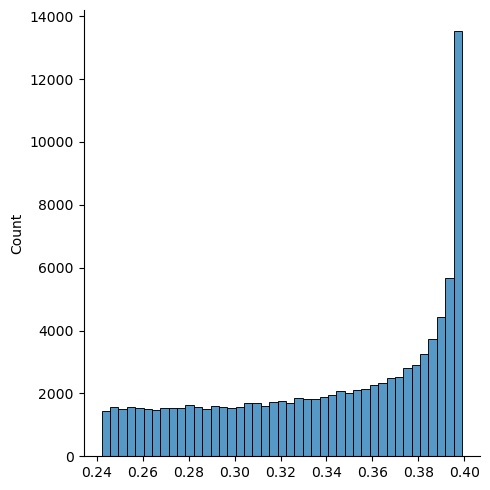

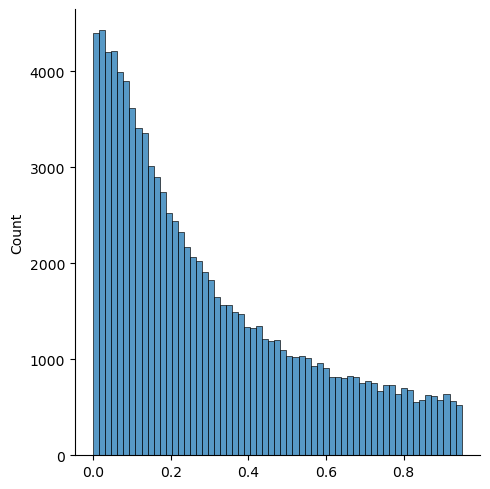

In [87]:
# Part 2
import seaborn as sns

problem1_samples = problem1_inversion(100000)

sns.displot(problem1_samples)

f=lambda x: (2*np.exp(x**2)*x)/(np.exp(1)-1)
true_dist = [f(np.random.rand(1)[0])*0.3 for _ in range(100000)]
sns.displot(true_dist)

In [ ]:
# Part 3

problem1_integral = XXX


In [ ]:
# Part 4
import Utils
#the code won t run indeed, just using utils to estimate Hoeff. confidence interval based on y_pred and y_true
problem1_interval = classification_report_interval(true_values_of_integral, estimates_values_of_integral, aplha=0.05)


In [ ]:
# Part 5

def problem1_inversion_2(n_samples=1):
    # Distribution from part 2
    # write the code in this function to produce samples from the distribution in the assignment
    # Make sure you choose a good sampling distribution to avoid unnecessary rejections

    #initiate output variable
    output = []
    
    #inverse(derivative) of CDF is our target density
    f=lambda x: (20*(np.exp(20-(1/x))+((np.exp((20*x-1)/x))/x)))
    
    # normal distribution is a sampling density g(x) that satisfies f (x) ≤ M g(x)
    g=lambda x: np.exp(-(x**2)/2)/(np.sqrt(2*3.14))
   
    #If y < f(x)/M, where f(x) is the probability density function and M is a constant, then 
    #accept the value x as a sample from the distribution f(x).
    
    while len(output) < n_samples:
        #6: Generate x from g and compute the ratio r(x) = f (x)/Mg(x)
        x = g(np.random.rand(1)[0])
        r = f(x)/(0.3*g(x))

        # 7: Draw U ∼ Uniform([0, 1]) and set Xt+1 = x, if U ≤ r(x), otherwise goto 6
        U = np.random.rand(1)[0]

        if U <= r:
            output.append(x)
    
    # Return a numpy array of length n_samples
    return output

---
#### Local Test for Exam vB, PROBLEM 1
Evaluate cell below to make sure your answer is valid.                             You **should not** modify anything in the cell below when evaluating it to do a local test of                             your solution.

In [78]:

# This cell is just to check that you got the correct formats of your answer
import numpy as np
try:
    assert(isinstance(problem1_inversion(10), np.ndarray)) 
except:
    print("Try again. You should return a numpy array from problem1_inversion")
else:
    print("Good, your problem1_inversion returns a numpy array")

try:
    assert(isinstance(problem1_samples, np.ndarray)) 
except:
    print("Try again. your problem1_samples is not a numpy array")
else:
    print("Good, your problem1_samples is a numpy array")

try:
    assert(isinstance(problem1_integral, float)) 
except:
    print("Try again. your problem1_integral is not a float")
else:
    print("Good, your problem1_integral is a float")

try:
    assert(isinstance(problem1_interval, list) or isinstance(problem1_interval, tuple)) , "problem1_interval not a tuple or list"
    assert(len(problem1_interval) == 2) , "problem1_interval does not have length 2, it should have a lower bound and an upper bound"
except Exception as e:
    print(e)
else:
    print("Good, your problem1_interval is a tuple or list of length 2")

try:
    assert(isinstance(problem1_inversion_2(10), np.ndarray)) 
except:
    print("Try again. You should return a numpy array from problem1_inversion_2")
else:
    print("Good, your problem1_inversion_2 returns a numpy array")

Good, your problem1_inversion returns a numpy array
Good, your problem1_samples is a numpy array
Try again. your problem1_integral is not a float
name 'problem1_interval' is not defined
Try again. You should return a numpy array from problem1_inversion_2


---
## Exam vB, PROBLEM 2
Maximum Points = 13


Let us build a proportional model ($\mathbb{P}(Y=1 \mid X) = G(\beta_0+\beta \cdot X)$ where $G$ is the logistic function) for the spam vs not spam data. Here we assume that the features are presence vs not presence of a word, let $X_1,X_2,X_3$ denote the presence (1) or absence (0) of the words $("free", "prize", "win")$.

1. [2p] Load the file `data/spam.csv` and create two numpy arrays, `problem2_X` which has shape (n_emails,3) where each feature in `problem2_X` corresponds to $X_1,X_2,X_3$ from above, `problem2_Y` which has shape **(n_emails,)** and consists of a $1$ if the email is spam and $0$ if it is not. Split this data into a train-calibration-test sets where we have the split $40\%$, $20\%$, $40\%$, put this data in the designated variables in the code cell.

2. [4p] Follow the calculation from the lecture notes where we derive the logistic regression and implement the final loss function inside the class `ProportionalSpam`. You can use the `Test` cell to check that it gives the correct value for a test-point.

3. [4p] Train the model `problem2_ps` on the training data. The goal is to calibrate the probabilities output from the model. Start by creating a new variable `problem2_X_pred` (shape `(n_samples,1)`) which consists of the predictions of `problem2_ps` on the calibration dataset. Then train a calibration model using `sklearn.tree.DecisionTreeRegressor`, store this trained model in `problem2_calibrator`.

4. [3p] Use the trained model `problem2_ps` and the calibrator `problem2_calibrator` to make final predictions on the testing data, store the prediction in `problem2_final_predictions`. Compute the $0-1$ test-loss and store it in `problem2_01_loss` and provide a $99\%$ confidence interval of it, store this in the variable `problem2_interval`, this should again be a tuple as in **problem1**.

In [161]:
import csv

with open('data/spam.csv', newline='') as csvfile:
    
    y = []
    x = []

    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')

    for n,row in enumerate(spamreader):
        if n != 0:

            if "spam" in row[0]:
                y.append(1)
            elif "ham" in row[0]:
                y.append(0)
            #if row isn't in correct format
            else:
                print(row)

            #assign to x values initial value
            x1 = 0
            x2 = 0
            x3 = 0

            #check if certain word is in text
            for text in row[1:]:
                if "free" in text:
                    x1 = 1
                if "prize" in text:
                    x2 = 1
                if "win" in text:
                    x3 = 1

            #append to feature table
            x.append(np.array([x1,x2,x3]))
        


In [122]:
# Part 1
from sklearn.model_selection import train_test_split

problem2_X = np.array(x)
problem2_Y = np.array(y)

#split into train test
X_train, X_test, y_train, y_test = train_test_split(problem2_X, problem2_Y, test_size=0.4, random_state=1)

#based on previous split to train and cal
X_train, X_cal, y_train, y_cal = train_test_split(X_train, y_train, test_size=0.2/0.6, random_state=1)

problem2_X_train = X_train
problem2_X_calib = X_cal
problem2_X_test = X_test

problem2_Y_train = y_train
problem2_Y_calib = y_cal
problem2_Y_test = y_test

print(problem2_X_train.shape,problem2_X_calib.shape,problem2_X_test.shape,problem2_Y_train.shape,problem2_Y_calib.shape,problem2_Y_test.shape)


(2229, 3) (1115, 3) (2230, 3) (2229,) (1115,) (2230,)


In [135]:
# Part 2

class ProportionalSpam(object):
    def __init__(self):
        self.coeffs = None
        self.result = None
    
    # define the objective/cost/loss function we want to minimise
    def loss(self,X,Y,coeffs):
        from sklearn.metrics import log_loss
        return log_loss(Y,X) # using sci-kit learn logloss

    def fit(self,X,Y):
        import numpy as np
        from scipy import optimize

        #Use the f above together with an optimization method from scipy
        #to find the coefficients of the model
        opt_loss = lambda coeffs: self.loss(X,Y,coeffs)
        initial_arguments = np.zeros(shape=X.shape[1]+1)
        self.result = optimize.minimize(opt_loss, initial_arguments,method='cg')
        self.coeffs = self.result.x
    
    def predict(self,X):
        #Use the trained model to predict Y
        if (self.coeffs is not None):
            G = lambda x: np.exp(x)/(1+np.exp(x))
            return np.round(10*G(np.dot(X,self.coeffs[1:])+self.coeffs[0]))/10 # This rounding is to help you with the calibration


In [137]:
# Part 3
from sklearn import tree
model = ProportionalSpam()

#problem2_ps = model.fit(problem2_X_train, problem2_Y_train) #this lines throws an error

problem2_X_pred = model.predict(problem2_X_calib)

tree_model = tree.DecisionTreeRegressor()
problem2_calibrator = tree_model.fit(problem2_X_calib, problem2_Y_calib)


In [ ]:
# Part 4

# These are the predicted probabilities
problem2_final_predictions = model.predict(problem2_X_test)


# In order to compute this loss we first need to convert the predicted probabilities to a decision
# recall the Bayes classifier?
problem2_01_loss = XXX

# Recall the interval is given as a tuple (a,b) or a list [a,b]
problem2_interval = XXX

---
#### Local Test for Exam vB, PROBLEM 2
Evaluate cell below to make sure your answer is valid.                             You **should not** modify anything in the cell below when evaluating it to do a local test of                             your solution.

In [ ]:
try:
    import numpy as np
    test_instance = ProportionalSpam()
    test_loss = test_instance.loss(np.array([[1,0,1],[0,1,1]]),np.array([1,0]),np.array([1.2,0.4,0.3,0.9]))
    assert (np.abs(test_loss-1.2828629432232497) < 1e-6)
    print("Your loss was correct for a test point")
except:
    print("Your loss was not correct on a test point")

---
## Exam vB, PROBLEM 3
Maximum Points = 13


Consider the following four Markov chains, answer each question for all chains:

<img width="400px" src="pictures/MarkovA.png">Markov chain A</img>
<img width="400px" src="pictures/MarkovB.png">Markov chain B</img>
<img width="400px" src="pictures/MarkovC.png">Markov chain C</img>
<img width="400px" src="pictures/MarkovD.png">Markov chain D</img>

1. [2p] What is the transition matrix?
2. [2p] Is the Markov chain irreducible?
3. [3p] Is the Markov chain aperiodic? What is the period for each state?
4. [3p] Does the Markov chain have a stationary distribution, and if so, what is it?
5. [3p] Is the Markov chain reversible?

In [140]:
# PART 1

#------------------------TRANSITION MATRIX -------------------------------
# Answer each one by supplying the transition matrix as a numpy array
# of shape (n_states,n_states), where state (A,B,...) corresponds to index (0,1,...)

problem3_A = np.array([[0.8, 0.2, 0, 0],
                         [0.6, 0.2, 0.2, 0],
                         [0, 0.4, 0, 0.6],
                         [0, 0, 0.8, 0.2]])
problem3_B    = np.array([[0, 0.2, 0, 0.8],
                         [0, 0, 1, 0],
                         [0, 1, 0, 0],
                         [0.5, 0, 0.5, 0]])
problem3_C    = np.array([[0.2, 0.3, 0, 0, 0.5],
                         [0.2, 0.2, 0.6, 0, 0],
                         [0, 0.4, 0.6, 0, 0],
                         [0, 0, 0, 0.6, 0.4],
                         [0, 0, 0, 0.4, 0.6]]
                         )
problem3_D  = np.array([[0.8, 0.2, 0, 0],
                         [0.6, 0.2, 0.2, 0],
                         [0, 0.4, 0.6, 0],
                         [0.1, 0, 0.7, 0.2]])

In [ ]:
# PART 2
#------------------------REDUCIBLE -------------------------------
# Answer each one with a True or False

problem3_A_irreducible = True
problem3_B_irreducible = False
problem3_C_irreducible = False
problem3_D_irreducible = True


In [ ]:
# PART 3
#------------------------APERIODIC-------------------------------
# Answer each one with a True or False

problem3_A_is_aperiodic = True
problem3_B_is_aperiodic = False
problem3_C_is_aperiodic = False
problem3_D_is_aperiodic = True

# Answer the following with the period of the states as a numpy array
# of shape (n_states,)

problem3_A_periods = np.array(0,0,0,0)
problem3_B_periods = np.array(0,2,2,0)
problem3_C_periods = np.array(0,0,0,2,2)
problem3_D_periods = np.array(0,0,0,0)


In [159]:
import numpy as np

#I am using linear algebra to reformulate the problem of finding stationary distribution
#If the sum of results of variables in the system of equations is equal to 1
#I add row constraining the sum of variables to be 1

problem3_A_constrained = np.append(problem3_A, [[1, 1, 1, 1]], axis=0)
b = np.array([0, 0, 0, 0, 1])
solution, residuals, rank, singular_values = np.linalg.lstsq(problem3_A_constrained, b, rcond=None)
print(sum(solution))
print(solution)
print()


problem3_B_constrained = np.append(problem3_B, [[1, 1, 1, 1]], axis=0)
b = np.array([0, 0, 0, 0, 1])
solution, residuals, rank, singular_values = np.linalg.lstsq(problem3_B_constrained, b, rcond=None)
print(sum(solution))
print(solution)
print()


problem3_C_constrained = np.append(problem3_C, [[1, 1, 1, 1, 1]], axis=0)
b = np.array([0, 0, 0, 0, 0, 1])
solution, residuals, rank, singular_values = np.linalg.lstsq(problem3_C_constrained, b, rcond=None)
print(sum(solution))
print(solution)
print()


problem3_D_constrained = np.append(problem3_D, [[1, 1, 1, 1]], axis=0)
b = np.array([0, 0, 0, 0, 1])
solution_D, residuals, rank, singular_values = np.linalg.lstsq(problem3_D_constrained, b, rcond=None)
print(sum(solution_D))
print(solution_D)
print()


0.9259259259259247
[-0.92592593  3.33333333  0.55555556 -2.03703704]

0.8596491228070178
[5.61403509e-01 1.05263158e-01 2.32483696e-16 1.92982456e-01]

0.9725609756097566
[ 0.84146341  0.42987805 -0.31707317  0.46646341 -0.44817073]

0.9993525412754936
[-0.07834251  0.38944642 -0.25315636  0.94140499]



In [160]:
# PART 4
#------------------------STATIONARY DISTRIBUTION-----------------
# Answer each one with a True or False

problem3_A_has_stationary = False
problem3_B_has_stationary = False
problem3_C_has_stationary = False
problem3_D_has_stationary = True

# Answer the following with the stationary distribution as a numpy array of shape (n_states,)
# if the Markov chain has a stationary distribution otherwise answer with False

problem3_A_stationary_dist = False
problem3_B_stationary_dist = False
problem3_C_stationary_dist = False
problem3_D_stationary_dist = np.array(solution_D)



In [ ]:
#π(x)P (x, y) = π(y)P (y, x) for all x, y ∈ X . (1)
# A Markov chain whose stationary distribution π and transition probability
# matrix P satisfy (1) is called reversible.

In [ ]:
# PART 5
#------------------------REVERSIBLE-----------------
# Answer each one with a True or False

problem3_A_is_reversible = False
problem3_B_is_reversible = False
problem3_C_is_reversible = False
problem3_D_is_reversible = False